In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
df1=pd.read_csv("/content/drive/MyDrive/DA Worksheets/16. students.csv")

In [3]:
df2=pd.read_csv("/content/drive/MyDrive/DA Worksheets/16. pet_training.csv")

In [4]:
df1.head()

,A,B,C,D
0,60,34,28,69
1,44,43,26,52
2,43,68,26,99
3,32,42,77,47
4,66,62,80,68


In [5]:
df1.describe()

,A,B,C,D
count,100.00000,100.000000,100.000000,100.000000
mean,51.67000,50.360000,57.550000,61.660000
std,11.55842,17.316145,23.239802,23.384887
min,32.00000,20.000000,20.000000,21.000000
25%,42.00000,35.000000,38.500000,43.000000
50%,53.00000,50.000000,55.500000,65.000000
75%,60.00000,65.000000,79.250000,80.000000
max,93.00000,80.000000,100.000000,100.000000


1.

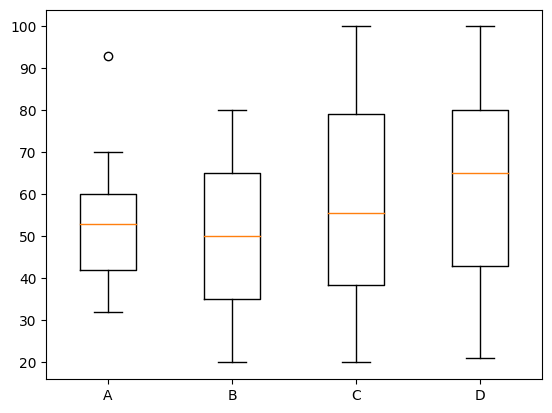

In [6]:
data = [df1['A'], df1['B'], df1['C'],df1['D']]
labels = ['A', 'B', 'C','D']

plt.boxplot(data, labels=labels)
plt.show()

From the boxplot for each columns we can conclude that

A- Left Skewed,
B-Symmetrical,
C-Right Skewed,
D-Left Skewed

2.

In [7]:
skewness={x:0 for x in df1}
for col in df1:
  skewness[col]=df1[col].skew()
skewness

{'A': 0.2993845780626721,
 'B': 0.00975383144860359,
 'C': 0.03216661063144165,
 'D': -0.061752887460257005}

In [28]:
P_Skew={x:0 for x in df1}
for col in df1:
  P_Skew[col]=3*(df1[col].mean()-df1[col].median())/df1[col].std()
print("The pearson moment coefficient of skewness for the fitness plans is:")
P_Skew

The pearson moment coefficient of skewness for the fitness plans is:


{'A': -0.3452028938810985,
 'B': 0.06236953893488754,
 'C': 0.26463220620086547,
 'D': -0.4284818694278207}

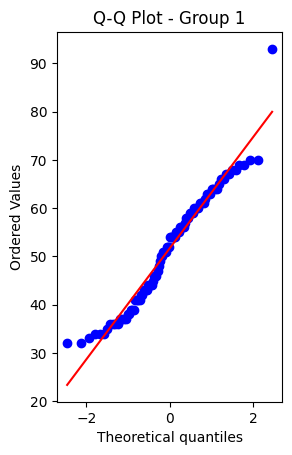

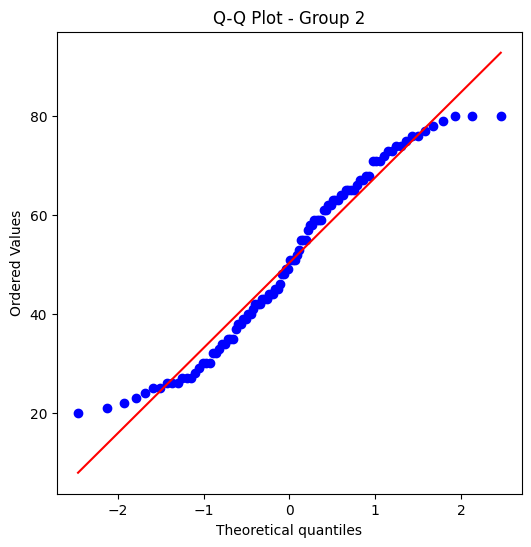

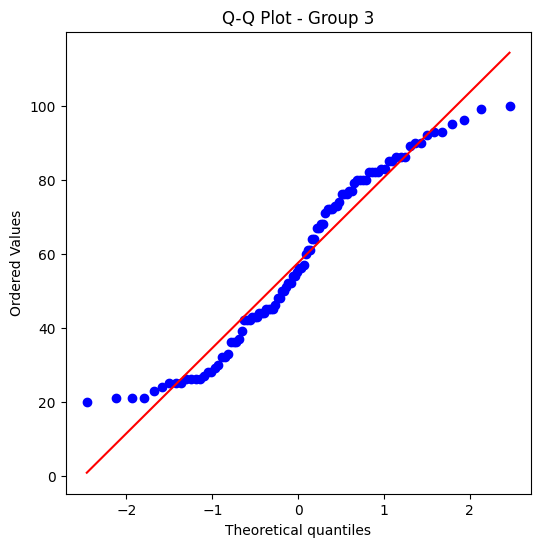

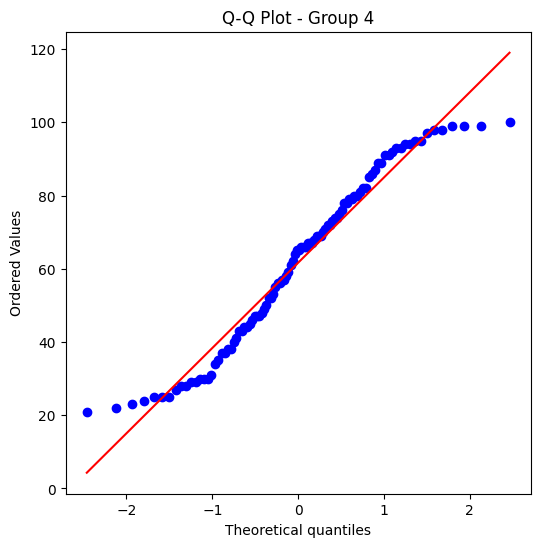

In [8]:
data_group1 = df1['A']
data_group2 = df1['B']
data_group3 = df1['C']
data_group4 = df1['D']

plt.subplot(1, 2, 2)
stats.probplot(data_group1, dist='norm', plot=plt)
plt.title('Q-Q Plot - Group 1')
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(data_group2, dist='norm', plot=plt)
plt.title('Q-Q Plot - Group 2')
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(data_group3, dist='norm', plot=plt)
plt.title('Q-Q Plot - Group 3')
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(data_group4, dist='norm', plot=plt)
plt.title('Q-Q Plot - Group 4')
plt.show()


From the Q-Q plots we can see that for all the groups the points lie close to the diagonal line and hence we can conclude that the data is distributed normally.

3.

ANOVA is used to compare means from two or more groups to determine if there are statistically significant differences among the group means.Since we have four different fitness plans,ANOVA test is the most suitable.

Null Hypothesis (H0): There is no significant difference in the average scores obtained by students under different fitness plans.

Alternative Hypothesis (Ha): There is a significant difference in the average scores obtained by students under different fitness plans.

Now we find the F-statistic value and the P-value.
Then we compare the P-value with alpha(0.05) to check if there is a significant difference in the average scores.

In [9]:
f_statistic,p_value = stats.f_oneway(df1['A'],df1['B'],df1['C'],df1['D'])
print("F-statistic:",f_statistic)
print("P-value:",p_value)
alpha = 0.05
if p_value < alpha:
    print("The output of the test signifies that there is evidence to suggest a difference in the average scores obtained by students in different fitness plans.")
else:
    print("The output of the test signifies that there is no significant difference in the average scores obtained by students in different fitness plans.")

F-statistic: 7.28693287475799
P-value: 9.096593796805658e-05
The output of the test signifies that there is evidence to suggest a difference in the average scores obtained by students in different fitness plans.


4.

In [10]:
df2.head()

,Pet,Treat,Task,ResponseTime
0,1,I,A,0.508638
1,2,I,B,0.086186
2,3,I,C,0.366532
3,4,I,D,0.346787
4,5,I,A,0.346787


In [11]:
avg_time = df2.groupby('Task')['ResponseTime'].mean()
avg_time

Task
A    0.524589
B    0.241031
C    0.439160
D    0.309907
Name: ResponseTime, dtype: float64

From the average values for each task we can see that task B exhibits the lowest average traiing time.

In [14]:
formula = 'ResponseTime ~ (Task) + (Treat) + (Task):(Treat)'
model = ols(formula, data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq    df          F        PR(>F)
Task        0.583493   3.0  23.175939  1.574039e-08
Treat       0.937415   2.0  55.850223  9.216636e-12
Task:Treat  0.052583   6.0   1.044282  4.134676e-01
Residual    0.302120  36.0        NaN           NaN


Since the p-value for (Task):(Treat) is greater than alpha(0.05),we can conclude  that Task and Treats do not have a significant influence on training time of the pets.

5.

In [17]:
df2['Treat'] = pd.Categorical(df2['Treat'])
df2['Task'] = pd.Categorical(df2['Task'])

formula = 'ResponseTime ~ Treat * Task'
model = ols(formula, data=df2).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print(anova_result)

posthoc_treat = pairwise_tukeyhsd(df2['ResponseTime'], df2['Treat'])
print(posthoc_treat)

posthoc_task = pairwise_tukeyhsd(df2['ResponseTime'], df2['Task'])
print(posthoc_task)

              sum_sq    df          F        PR(>F)
Treat       0.937415   2.0  55.850223  9.216636e-12
Task        0.583493   3.0  23.175939  1.574039e-08
Treat:Task  0.052583   6.0   1.044282  4.134676e-01
Residual    0.302120  36.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     I     II   0.0917 0.1822 -0.032 0.2154  False
     I    III   0.3315    0.0 0.2077 0.4552   True
    II    III   0.2397 0.0001  0.116 0.3635   True
--------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -0.2836 0.0011 -0.4704 -0.0968   True
     A      C  -0.0854  0.617 -0.2722  0.1014  False
     A      D  -0.2147 0.0186 -0.4015 -0.0279   True
     B      C   0.1981 0.0338  0.0113  0.3849   True
     B     

Yes,the choice of treats significantly impacts the training time. This is because the p value for the null hypothesis III-II and III-I is lesser than alpha(0.05) and thus we reject the null hypothesis whereas the p value for II-I is greater than alpha(0.05) and thus we fail to reject the null hypothesis.


The choice of treats does have a significant impact on training time. Specifically, group III tends to have significantly higher training times than group I, and group II also tends to have higher #training times than group I. These differences are statistically significant.


Impact of Tasks :
The choice of tasks also significantly impacts training time.Task B  has lower training times than Task A, and Task D also has lower training times than Task A. These differences are statistically significant.


The interaction between treats and tasks (Treat:Task) is not statistically significant as the p-value(0.413) is greater than alpha(0.05). This implies that the combination of specific treats and tasks does not lead to significant differences in training time.In summary, both the choice of treats and tasks have a significant impact on training time. Treat combination I and II lead to faster training time. The task combination B and D lead to faster training time.